In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Visualization
import matplotlib.pyplot as plt

# MLflow for tracking
import mlflow
import mlflow.sklearn


In [37]:
import os
print(os.getcwd())


C:\Users\Mahmoud\Downloads


In [8]:
data = pd.read_excel('Final Dataset.xlsx')


In [10]:
# View basic information about the dataset
print(data.head())
print(data.info())

# Handle missing values (if any)
data = data.dropna()



   Customer number  customerID  gender  SeniorCitizen Partner Dependents  \
0      55906321449  7590-VHVEG  Female              0     Yes         No   
1      55906354384  5575-GNVDE    Male              0      No         No   
2      55906387319  3668-QPYBK    Male              0      No         No   
3      55906420254  7795-CFOCW    Male              0      No         No   
4      55906453189  9237-HQITU  Female              0      No         No   

   tenure PhoneService     MultipleLines InternetService  ...  \
0       1           No  No phone service             DSL  ...   
1      34          Yes                No             DSL  ...   
2       2          Yes                No             DSL  ...   
3      45           No  No phone service             DSL  ...   
4       2          Yes                No     Fiber optic  ...   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check          29.85        29.85  

In [12]:

# Separate the target column 'Churn' before using get_dummies
y = data[' customer cuhurn']

# Drop 'Churn' from the features before using get_dummies
X = data.drop(' customer cuhurn', axis=1)

# Apply get_dummies on the features only
X = pd.get_dummies(X, drop_first=True)


In [14]:
import pandas as pd

# Ensure the target column 'Churn' is correctly specified
y = data[' customer cuhurn']  # Separate target before transforming the rest of the data

# Drop 'Churn' from the feature set
X = data.drop(' customer cuhurn', axis=1)

# Apply get_dummies on the feature set only
X = pd.get_dummies(X, drop_first=True)

# X now contains the transformed feature set and y is your target


In [24]:
# Splitting the dataset into training and testing sets
X = data.drop('Churn', axis=1)  # Replace 'churn' with your actual target column
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# Convert categorical variables to dummy/indicator variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that X_train and X_test have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [32]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(y_test, y_pred))

# ROC Curve


Accuracy: 1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [42]:
# Convert 'Yes'/'No' to 1/0
y_test_binary = y_test.map({'Yes': 1, 'No': 0})

# Alternatively, if the labels are different, adjust accordingly
# y_test_binary = y_test.map({'churned_label': 1, 'non_churned_label': 0})


C:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


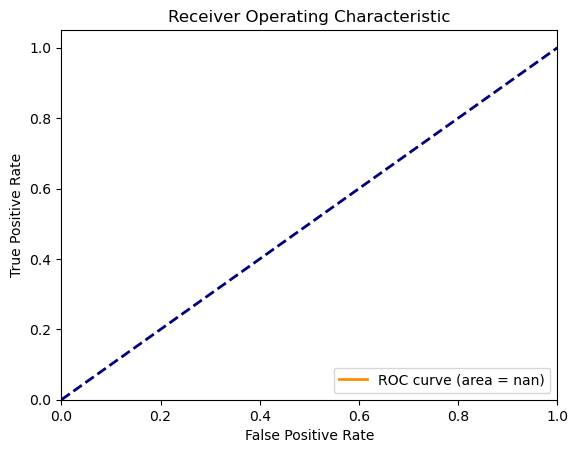

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [50]:
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label='Yes')
roc_auc = auc(fpr, tpr)


C:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [54]:
# Set up MLflow experiment
mlflow.set_experiment("Customer Churn Prediction")

# Start MLflow run
with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("n_estimators", 100)
    
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    
    # Log model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    
    print("Model and metrics logged in MLflow.")


2024/10/12 14:34:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model and metrics logged in MLflow.


In [ ]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

# Set MLflow experiment
mlflow.set_experiment("Customer Churn Prediction")

# Start MLflow run
with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("n_estimators", 100)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Infer the signature (schema of inputs and outputs)
    input_example = X_train[:5]  # Use a small sample of your training data as an input example
    signature = infer_signature(X_train, rf_model.predict(X_train))

    # Log the model with signature and input example
    mlflow.sklearn.log_model(rf_model, "random_forest_model", signature=signature, input_example=input_example)

    print("Model and metrics logged in MLflow with signature and input example.")
